In [ ]:
import src.generators as generators
import src.estimators as estimators
from math import log, exp
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

*The results may be different that what is in the article, as the data sets are randomized at every execution of the program.*

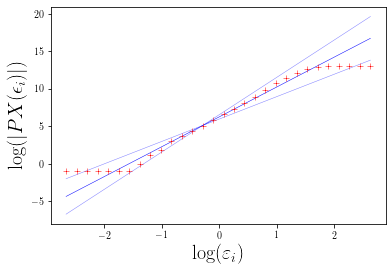

In [1]:
cloud = generators.torus_sample(n=1000, dimension=4)

scales = []
e0 = 0.07
for i in range(1,31):
    scales.append(e0)
    e0 *= 1.2
    
count = estimators.count_scales(cloud, scales, mute=True)
    
X = [log(x) for x in scales]
Y = [log(y) if y>0 else -1 for y in count]

plt.scatter(X,Y, zorder=10, color='red', marker="+", linewidth=0.5)
plt.plot(X, [Y[13]-3*X[13]+3*i for i in X], color="blue", alpha=0.5, linewidth=0.5)
plt.plot(X, [Y[13]-4*X[13]+4*i for i in X], color="blue", alpha=1, linewidth=0.5)
plt.plot(X, [Y[13]-5*X[13]+5*i for i in X], color="blue", alpha=0.5, linewidth=0.5)

plt.xlabel(r'$\log(\varepsilon_i)$', fontsize=20)
plt.ylabel(r'$\log(\vert PX(\epsilon_i)\vert)$', fontsize=20)

plt.tight_layout()
plt.savefig('loglog.pgf')
plt.show()

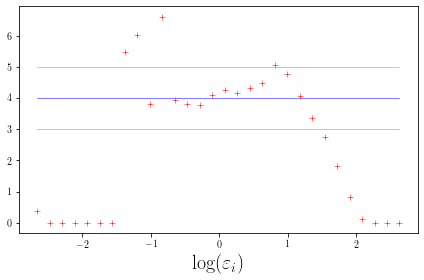

In [4]:
Z = [(x-y)/(z-t) for x,y,z,t in zip(Y, [0]+Y, X, [0]+X)]

plt.scatter(X,Z, zorder=10, color='red', marker="+", linewidth=0.5)
plt.plot(X, [3 for i in X], color="blue", alpha=0.5, linewidth=0.5)
plt.plot(X, [4 for i in X], color="blue", alpha=1, linewidth=0.5)
plt.plot(X, [5 for i in X], color="blue", alpha=0.5, linewidth=0.5)

plt.xlabel(r'$\log(\varepsilon_i)$', fontsize=20)

plt.tight_layout()
plt.savefig('loglog2.pgf')
plt.show()